# NOTEBOOK FOR SPECTRA RESAMPLING AND COMBINATION TESTING
Ideally want to resample the wavelength grid to that of our spectral resolution
- We can oversample but this will lead to correlation between points

In [3]:
%load_ext lab_black

# SETTING SOURCE ID

In [4]:
ID = 74

# Import Packages

In [5]:
import numpy as np
import pandas as pd
import astropy.io.fits as apfits
import astropy.visualization as apvis
import astropy.nddata as apnndd
import astropy.table as aptable
import astropy.wcs as apwcs
import astropy.units as apunits
import astropy.coordinates as apcoords
import matplotlib.pyplot as mplplot
import matplotlib.patches as mplpatches
import glob
import os
import scipy as sp
import scipy.optimize as spopt
import copy
import grismconf
import sys
import spectres

# Load in Functions from Original Script

In [6]:
%run Functions_Notebook.ipynb

/Users/zx446701/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:46: UserWarning: PYSYN_CDBS is undefined; functionality will be SEVERELY crippled.
  warnings.warn("PYSYN_CDBS is undefined; functionality will be SEVERELY "
/Users/zx446701/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-040-001 DOESN'T MATCH THE CURRENT ONLINE VERSION PRDOPSSOC-051
Please consider updating pysiaf, e.g. pip install --upgrade pysiaf or conda update pysiaf


# Load in Datasets required

### Load Image File

In [7]:
file_name = "/Users/zx446701/OneDrive - The Open University/Ice_Age/Fengwu_Sims_2/F444W_grism/F444W_Level15_Frames/jw01309025001_01101_00001_nrca5_rate_lv1.5.fits"
fits_file = apfits.open(file_name)
file_data = fits_file["SCI"].data

## Extract Frames Data Files

In [8]:
file_path = "/Users/zx446701/Documents/Astro_Projects/Ice_Proposals/IceAge_ERS/Spectral_Extraction_Code/Test_Frame_Cluster_Outputs/"
P1 = "jw01309025001_01101_00001_nrca5_rate_lv1.5_F444W_A_R_Primary1_Exp00001_"
P2 = "jw01309025001_01101_00002_nrca5_rate_lv1.5_F444W_A_R_Primary1_Exp00002_"
P3 = "jw01309025001_01101_00003_nrca5_rate_lv1.5_F444W_A_R_Primary1_Exp00003_"
P4 = "jw01309025001_01101_00004_nrca5_rate_lv1.5_F444W_A_R_Primary1_Exp00004_"

initial_params = "OptBoxInitParams_result_array.npy"
fitDF = "fitted_dataframe.pkl"
res_arr = "OptBoxInitParams_result_array.npy"
res_err_arr = "OptBoxInitParams_result_error_array.npy"

trace_x = "trace_x_pixels.npy"
trace_y = "trace_y_pixels.npy"
trace_WL = "trace_WL.npy"

In [9]:
in_frameP1_name = file_path + P1 + fitDF
in_frameP1 = pd.read_pickle(in_frameP1_name)
initial_paramsP1 = np.load(file_path + P1 + initial_params)
res_arrP1 = np.load(file_path + P1 + res_arr)
res_err_arrP1 = np.load(file_path + P1 + res_err_arr)
trace_xP1 = np.load(file_path + P1 + trace_x, allow_pickle=True)
trace_yP1 = np.load(file_path + P1 + trace_y, allow_pickle=True)
trace_WLP1 = np.load(file_path + P1 + trace_WL, allow_pickle=True)

in_frameP2_name = file_path + P2 + fitDF
in_frameP2 = pd.read_pickle(in_frameP2_name)
initial_paramsP2 = np.load(file_path + P2 + initial_params)
res_arrP2 = np.load(file_path + P2 + res_arr)
res_err_arrP2 = np.load(file_path + P2 + res_err_arr)
trace_xP2 = np.load(file_path + P2 + trace_x, allow_pickle=True)
trace_yP2 = np.load(file_path + P2 + trace_y, allow_pickle=True)
trace_WLP2 = np.load(file_path + P2 + trace_WL, allow_pickle=True)

in_frameP3_name = file_path + P3 + fitDF
in_frameP3 = pd.read_pickle(in_frameP3_name)
initial_paramsP3 = np.load(file_path + P3 + initial_params)
res_arrP3 = np.load(file_path + P3 + res_arr)
res_err_arrP3 = np.load(file_path + P3 + res_err_arr)
trace_xP3 = np.load(file_path + P3 + trace_x, allow_pickle=True)
trace_yP3 = np.load(file_path + P3 + trace_y, allow_pickle=True)
trace_WLP3 = np.load(file_path + P3 + trace_WL, allow_pickle=True)

in_frameP4_name = file_path + P4 + fitDF
in_frameP4 = pd.read_pickle(in_frameP4_name)
initial_paramsP4 = np.load(file_path + P4 + initial_params)
res_arrP4 = np.load(file_path + P4 + res_arr)
res_err_arrP4 = np.load(file_path + P1 + res_err_arr)
trace_xP4 = np.load(file_path + P4 + trace_x, allow_pickle=True)
trace_yP4 = np.load(file_path + P4 + trace_y, allow_pickle=True)
trace_WLP4 = np.load(file_path + P4 + trace_WL, allow_pickle=True)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/zx446701/Documents/Astro_Projects/Ice_Proposals/IceAge_ERS/Spectral_Extraction_Code/Test_Frame_Cluster_Outputs/jw01309025001_01101_00001_nrca5_rate_lv1.5_F444W_A_R_Primary1_Exp00001_fitted_dataframe.pkl'

### Extract Filter, module and direction set up

In [ ]:
# Very specific to current file naming system
filter_ = in_frameP1_name[161:166]
module = in_frameP1_name[167]
direction = in_frameP1_name[169]
primary = in_frameP1_name[178]
exposure = in_frameP1_name[187]
print(filter_, module, direction, primary, exposure)

## RA Dec Matching returning Index 

FOUND ANOTHER WAY AROUND THIS BY SETTING DF INDEX AS RA AND DEC BELOW

In [ ]:
# frame1RA = in_frameP1.RA.values
# frame1Dec = in_frameP1.Dec.values
# frame2RA = in_frameP2.RA.values
# frame2Dec = in_frameP2.Dec.values

In [ ]:
# c = apcoords.SkyCoord(ra=frame1RA*apunits.degree, dec=frame1Dec*apunits.degree)
# catalog = apcoords.SkyCoord(ra=frame2RA*apunits.degree, dec=frame2Dec*apunits.degree)
# idx, d2d, d3d = c.match_to_catalog_sky(catalog)
# OR MATCH_COORDINATES_SKY

In [ ]:
# idx

In [ ]:
# display(pd.DataFrame(trace_WLP1))
# display(pd.DataFrame(trace_WLP2))

## RA and Dec Catalog Checking

SHOWS THAT SOME OF FENGWUS ID'S DO NOT MATCH

In [ ]:
#  Indexing in frame source information by RA and Dec to
df1 = in_frameP1
df2 = in_frameP2
df3 = in_frameP3
df4 = in_frameP4

### How to add extracted Spectra to DF TO MATCH RA AND DEC

In [ ]:
df1["Extracted_Spec"] = res_arrP1.tolist()
df2["Extracted_Spec"] = res_arrP2.tolist()
df3["Extracted_Spec"] = res_arrP3.tolist()
df4["Extracted_Spec"] = res_arrP4.tolist()

In [ ]:
df1["Extracted_Spec_err"] = res_err_arrP1.tolist()
df2["Extracted_Spec_err"] = res_err_arrP2.tolist()
df3["Extracted_Spec_err"] = res_err_arrP3.tolist()
df4["Extracted_Spec_err"] = res_err_arrP4.tolist()

In [ ]:
df1["OptBoxOutput"] = initial_paramsP1.tolist()
df2["OptBoxOutput"] = initial_paramsP2.tolist()
df3["OptBoxOutput"] = initial_paramsP3.tolist()
df4["OptBoxOutput"] = initial_paramsP4.tolist()

In [ ]:
df1["TraceX"] = trace_xP1.tolist()
df2["TraceX"] = trace_xP2.tolist()
df3["TraceX"] = trace_xP3.tolist()
df4["TraceX"] = trace_xP4.tolist()

In [ ]:
df1["TraceY"] = trace_yP1.tolist()
df2["TraceY"] = trace_yP2.tolist()
df3["TraceY"] = trace_yP3.tolist()
df4["TraceY"] = trace_yP4.tolist()

In [ ]:
df1["TraceWL"] = trace_WLP1.tolist()
df2["TraceWL"] = trace_WLP2.tolist()
df3["TraceWL"] = trace_WLP3.tolist()
df4["TraceWL"] = trace_WLP4.tolist()

In [ ]:
# df1.index == df4.index

In [ ]:
totaldata = pd.concat((df1, df2, df3, df4))

In [ ]:
Dec_RA_indexed_data = totaldata.sort_values(["RA", "Dec"]).set_index(["Dec", "RA"])

## Melissa's Target list


In [ ]:
melissa_input_spectra = pd.read_csv(
    "reddened_stars_march22/BGstars_final_catalog.txt", delim_whitespace=True
)

In [ ]:
melissa_input_spectra = melissa_input_spectra.set_index(["Dec", "RA"])

## Merge Melissa Target List information with Frame Source Data

We know that the source information matches as the RA and Dec indexes match!!!

In [ ]:
full_data = Dec_RA_indexed_data.join(melissa_input_spectra, how="inner")

## Previous Attempt

In [ ]:
# melissa_input_spectra

In [ ]:
# PrimaryFrameDF1 = df1.join(melissa_input_spectra, how="inner")
# PrimaryFrameDF2 = df2.join(melissa_input_spectra, how="inner")
# PrimaryFrameDF3 = df3.join(melissa_input_spectra, how="inner")
# PrimaryFrameDF4 = df4.join(melissa_input_spectra, how="inner")

In [ ]:
# totaldata = pd.concat(
#     (PrimaryFrameDF1, PrimaryFrameDF2, PrimaryFrameDF3, PrimaryFrameDF4)
# )

In [ ]:
# totaldata.set_index(["RA", "Dec"])

In [ ]:
# totaldata.iloc[0:1]["RA"] == totaldata.iloc[199:200]["RA"]

In [ ]:
# display(totaldata.iloc[0:1])
# display(totaldata.iloc[199:200])

## Brightest Target Finding For ETC

In [ ]:
cond1 = apcoords.SkyCoord('11h07m00s', '-77d21m36s', frame='icrs')
cond2 = apcoords.SkyCoord('11h00m19.5s', '-77d19m56s', frame='icrs')
print(cond1)
print(cond2)

In [ ]:
real_sources = melissa_input_spectra[melissa_input_spectra["No."] < 0].sort_values(
    "IRAC1_mJy"
)

In [ ]:
selector = (
    (real_sources.index.get_level_values(0) > 165.08125)
    & (real_sources.index.get_level_values(0) < 166.75)
    & (real_sources.index.get_level_values(1) > -77.36)
    & (real_sources.index.get_level_values(1) < -77.33222222)
)
# melissa_input_spectra.loc[selector]

In [ ]:
melissa_input_spectra["No."]

In [ ]:
# Sort by IRAC mJy Flux
bright_sorted = melissa_input_spectra.sort_values("IRAC1_mJy")
# display(bright_sorted[-10:])

real_bright_sourted = real_sources.sort_values("IRAC1_mJy")
# display(real_bright_sourted[selector])

In [ ]:
# display(melissa_input_spectra[melissa_input_spectra.IRAC1_mJy==melissa_input_spectra.IRAC1_mJy.max()])
# melissa_input_spectra[melissa_input_spectra.IRAC1_mJy==melissa_input_spectra.IRAC1_mJy.max()].index[0]

In [ ]:
c = apcoords.SkyCoord(ra=166.380350*apunits.degree, dec=-77.417756*apunits.degree)

In [ ]:
cfk5= c.transform_to('fk5')
cfk5
cfk5.to_string('hmsdms')

## Sensivity Curve Setup & Crossover (for filter combination)

Only necessary for 1st Order traces as F444W 2nd order traces are not strong enough, also the wavelengths will not crossover even if it was 

In [ ]:
# THERE ARE NO FILES WITH DIRECTION = C
H2OSensFile = apfits.open(f"/Users/zx446701/OneDrive - The Open University/Ice_Age/Fengwu_Sims_2/GRISM_NIRCAM-master/V3/NIRCam.F322W2.{direction}.{module}.1st.sensitivity.fits")
# print(repr(H2OSensFile[1].header)) # Units check
H2OSensTable = aptable.Table(H2OSensFile[1].data)
H2OSensData_WL = H2OSensTable[0][:]
H2OSensData_Sens = H2OSensTable[1][:]
H2OSensData_Er = H2OSensTable[2][:]

# Set up the Spectral Response Function Curve to perform Flux calibration (from ADU to Flux)
# fill_value = extrapolate required as the 2 wavelength ranges do not match
# SRFCurve = sp.interpolate.interp1d(SensData_WL,SensData_Sens,kind='linear',bounds_error=False,fill_value=0)#"extrapolate")
H2OSRFCurve = sp.interpolate.interp1d(H2OSensData_WL,H2OSensData_Sens,kind='cubic',fill_value="extrapolate")

# Create Dictionary of Curves to select from for flux calibration
H2OSRFCurves = {1: H2OSRFCurve}

In [ ]:
# THERE ARE NO FILES WITH DIRECTION = C
COSensFile = apfits.open(f"/Users/zx446701/OneDrive - The Open University/Ice_Age/Fengwu_Sims_2/GRISM_NIRCAM-master/V3/NIRCam.F444W.{direction}.{module}.1st.sensitivity.fits")
# print(repr(COSensFile[1].header)) # Units check
COSensTable = aptable.Table(COSensFile[1].data)
COSensData_WL = COSensTable[0][:]
COSensData_Sens = COSensTable[1][:]
COSensData_Er = COSensTable[2][:]

# Set up the Spectral Response Function Curve to perform Flux calibration (from ADU to Flux)
# fill_value = extrapolate required as the 2 wavelength ranges do not match
# SRFCurve = sp.interpolate.interp1d(SensData_WL,SensData_Sens,kind='linear',bounds_error=False,fill_value=0)#"extrapolate")
COSRFCurve = sp.interpolate.interp1d(COSensData_WL,COSensData_Sens,kind='cubic',fill_value="extrapolate")

# Create Dictionary of Curves to select from for flux calibration
COSRFCurves = {1: COSRFCurve}

### Throughput crossover

In [ ]:
mplplot.plot(H2OSensData_WL,H2OSRFCurve(H2OSensData_WL))
mplplot.plot(COSensData_WL,COSRFCurve(COSensData_WL))
mplplot.xlabel("Wavelength / $\mu$m")
mplplot.ylabel("Throughput")
mplplot.title(f"1st Order Sensitivity Curves for F322W2 A and F444W A",y=1.05)

In [ ]:
H2Ocondition = [H2OSensData_WL>COSensData_WL.min()]
COcondition = [COSensData_WL<H2OSensData_WL.max()]

maskH2OWL = H2OSensData_WL[H2Ocondition]
maskH2OSens = H2OSensData_Sens[H2Ocondition]
maskCOWL = COSensData_WL[COcondition]
maskCOSens = COSensData_Sens[COcondition]

H2O_LT_CO = H2OSensData_Sens[H2Ocondition]<COSensData_Sens[COcondition]
H2O_GT_CO = H2OSensData_Sens[H2Ocondition]>COSensData_Sens[COcondition]

In [ ]:
# AFTER APPLYING CONDITION, THE LENGTH OF THE ARRAYS IS EQUAL (760)
# THEREFORE WE ARE ABLE TO WORK WITH ASTROPY COLUMNS OF SENS CURVES 
# TO FIND THE WAVELENGTH AT WHICH F444W SENS CURVE HAS HIGHER THROUGHPUT
# THIS IS PRINTED BELOW
# print(len(H2OSensData_WL[H2Ocondition]))
# print(len(COSensData_WL[COcondition]))

cross_WL = maskH2OWL[H2O_LT_CO][0]
cross_WL_TP = maskH2OSens[H2O_LT_CO][0]
print(cross_WL)

In [ ]:
mplplot.plot(maskH2OWL[H2O_GT_CO],maskH2OSens[H2O_GT_CO],c='b',label="F322W2 > F444W Sensitivity")
mplplot.plot(maskH2OWL[H2O_LT_CO],maskH2OSens[H2O_LT_CO],c='b',ls='--',label="F322W2 < F444W Sensitivity")
mplplot.scatter(cross_WL,cross_WL_TP,c='r',marker='x',label=f'$\lambda$ = {cross_WL} $\mu$m')
mplplot.plot(maskCOWL[H2O_GT_CO],maskCOSens[H2O_GT_CO],c='orange',ls = '--',label="F322W2 > F444W Sensitivity")
mplplot.plot(maskCOWL[H2O_LT_CO],maskCOSens[H2O_LT_CO],c='orange',label="F322W2 < F444W Sensitivity")
mplplot.xlabel("$\lambda$ / $\mu$m")
mplplot.ylabel("Throughput")
mplplot.legend(loc='best',bbox_to_anchor=(1.05, 1))

## Flux calibration 

PROOF WE NEED TO RA DEC MATCH THE RESULTS ARRAYS AS DIFFERENT SUB PIXEL DITHERS HAVE SLIGHTLY DIFFERENT SOURCES

In [ ]:
mplplot.figure(figsize=(10,10))
mplplot.plot(res_arrP1[74]/PSFSensCurve[74],label='1')
mplplot.plot(res_arrP2[74]/PSFSensCurve[74],label='2')
mplplot.plot(res_arrP3[75]/PSFSensCurve[75],label='3')
mplplot.plot(res_arrP4[73]/PSFSensCurve[73],label='4')
mplplot.ylim(-0.5e-16,1e-16)
mplplot.xlim(500,1600)
mplplot.legend(loc='best')

In [26]:
type(trace_xP1)

numpy.ndarray

In [34]:
PSFSensCurves = []

primary_res_arrs = [res_arrP1,res_arrP2,res_arrP3,res_arrP4]
primary_res_err_arrs = [res_err_arrP1,res_err_arrP2,res_err_arrP3,res_err_arrP4]
primary_init_params = [initial_paramsP1,initial_paramsP2,initial_paramsP3,initial_paramsP4]
primary_trace_x = [trace_xP1,trace_xP2,trace_xP3,trace_xP4]
primary_trace_y = [trace_yP1,trace_yP2,trace_yP3,trace_yP4]
primary_trace_WL = [trace_WLP1,trace_WLP2,trace_WLP3,trace_WLP4]
primary_in_frame_data = [in_frameP1,in_frameP2,in_frameP3,in_frameP4]

# primary_calibrated_PSF_OptBox_Fluxes = []
# primary_calibrated_PSF_OptBox_FluxesErr = []

primaryFrameFluxCalData = []
primaryFrameFluxErrCalData = []
primaryOptBoxMethodData = []

primaryTraceWLs = []
primaryXPixels=[]
primaryYPixels=[]

for idx , (res_arr,res_err_arr,optboxIP,trace_x,trace_y,trace_WL,in_frame_data) in enumerate(zip(primary_res_arrs,primary_res_err_arrs,primary_init_params,primary_trace_x,primary_trace_y,primary_trace_WL,primary_in_frame_data)):

    PSFSensCurve = np.zeros_like(res_arr)

    # DO I NEED A FILTER AND MODULE CONDITION ON THIS DUE TO DIFFERENT DISP DIRECTIONS?
    # Currently for F444W A, wavelength follows low to high column number but B module would be reverse
    # THIS WOULD BE DONE ON THE CALIBRATED FLUX STEP LIKE RESULT / RESULTSENSCURVE[::-1]

    if direction == "R":

        for res_index in range(res_arr.shape[0]):
            """
            # WHERE [1] SITS IT NEEDS TO READ [ORDER] IN GENERALISED CODE 
            """
            PSFSensCurve[res_index,trace_x[res_index]] = COSRFCurves[1](trace_WL[res_index])
    else:

        for res_index in range(res_arr.shape[0]):
            PSFSensCurve[res_index,trace_y[res_index]] = COSRFCurves[1](trace_WL[res_index])
    
    # Appends each source's appropriate sensitivity curve to list
    PSFSensCurves.append(PSFSensCurve)
    
    print(res_arr.shape)
    print(PSFSensCurve.shape)
    # Calibrate fluxes by dividing extracted fluxes by sensitivity curve
    calibrated_PSF_OptBox_Flux = res_arr/PSFSensCurve
    
    # Calibrate errors by dividing extracted flux errors by sensitivity curve 
    calibrated_PSF_OptBox_FluxErr = res_err_arr/PSFSensCurve
    
    # Turn calibrated fluxes into PD DF and append to list
    frameFluxCalData = pd.DataFrame(calibrated_PSF_OptBox_Flux)
    primaryFrameFluxCalData.append(frameFluxCalData)
    
    # Turn calibrated errors into PD DF and append to list
    frameFluxErrCalData = pd.DataFrame(calibrated_PSF_OptBox_FluxErr)
    primaryFrameFluxErrCalData.append(frameFluxErrCalData)
    
    # Calibrate Optimal Box Method Fluxes by dividing extracted fluxes by sensitivity curve - DO NOT HAVE ERRORS WITH THIS METHOD
    calibrated_OptBox_Flux = optboxIP/PSFSensCurve
    frameOptBoxFluxCalData = pd.DataFrame(calibrated_OptBox_Flux)
    primaryOptBoxMethodData.append(frameOptBoxFluxCalData)
    
    # Turn trace wavelength list into PD DF
    primaryTraceWL = pd.DataFrame(trace_WL)
    
    # Primary X pixels to DF
    primaryXpixel = pd.DataFrame(trace_x)
    
    # Primary Y pixels to DF
    primaryYpixel = pd.DataFrame(trace_y)
    
    # Step creates Wavelength list same length as Flux (2048) but with NaN values in pixels that trace is not contained within
    # Means all flux, errors and wavelength Dfs are same size
    nan_padded_primaryTraceWL = np.full_like(frameFluxErrCalData, np.nan)
    
    if direction == "R":
        for i, (r, x, w) in enumerate(zip(nan_padded_primaryTraceWL,pd.DataFrame(primaryXpixel[0].to_list()).values, pd.DataFrame(primaryTraceWL[0].to_list()).values)):
            try:
                # print(x[~np.isnan(x)])
                r[x[~np.isnan(x)].astype(int)] = w[~np.isnan(x)]
            except ValueError as e:
                print(i,e)
        # pd.DataFrame(primaryTraceWL[0].to_list())
        nan_padded_primaryTraceWL = pd.DataFrame(nan_padded_primaryTraceWL,index=frameFluxCalData.index)
        primaryTraceWLs.append(nan_padded_primaryTraceWL)
    
    else:
        for i, (r, y, w) in enumerate(zip(pd.DataFrame(nan_padded_primaryTraceWL, primaryYpixel[0].to_list()).values, pd.DataFrame(primaryTraceWL[0].to_list()).values)):
            try:
                # print(x[~np.isnan(x)])
                r[y[~np.isnan(y)].astype(int)] = w[~np.isnan(y)]
            except ValueError as e:
                print(i,e)
        # pd.DataFrame(primaryTraceWL[0].to_list())
        nan_padded_primaryTraceWL = pd.DataFrame(nan_padded_primaryTraceWL,index=frameFluxCalData.index)
        primaryTraceWLs.append(nan_padded_primaryTraceWL)
    
    """IF FOR C GRISM, WANT Y PIXEL"""
    
    #.set_index(in_frame_data.FengwuID)
    primaryXPixels.append(primaryXpixel)
    primaryYPixels.append(primaryYpixel)

(199, 2048)
(199, 2048)


/Users/zx446701/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide
/Users/zx446701/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in true_divide
/Users/zx446701/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide


(199, 2048)
(199, 2048)
(199, 2048)
(199, 2048)
(199, 2048)
(199, 2048)


/Users/zx446701/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in true_divide


In [57]:
# # np.shape(primaryFrameFluxCalData[0][74])
# mplplot.plot(primaryFrameFluxCalData[0][74]/PSFSensCurves[0][74])
# # mplplot.plot(PSFSensCurves[0][74])
# # mplplot.ylim(0,1e-17)

In [58]:
# for i in range(4):
#     mplplot.figure(figsize=(10,10))
#     mplplot.imshow(primaryTraceWLs[i], aspect="auto")

## Contamination Mapping

### Calculate number of traces crossing each pixel

In [36]:
full_im_pixel_coords = np.mgrid[:2048,:2048].T.reshape((-1,2))

source_num_contam_map = np.sum([compute1stOrderTraceBox(
    (x,y),
    filter_=filter_,
    module=module,
    direction=direction,
    ec="orange",
    lw="2",
    fc="none",
    # simYDisp=True,
).contains_points(full_im_pixel_coords).reshape((2048,2048)) for sourceID, (x,y) in enumerate(zip(frame_info_merge.Direct_X_pixel, frame_info_merge.Direct_Y_pixel))],axis=0)

### Histogram of number of pixels with given no of sources

(array([526176., 760874., 882958., 929189., 505524., 330574., 149100.,
         76525.,  24117.,   9267.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

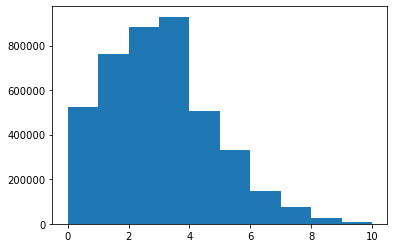

In [37]:
mplplot.hist(source_num_contam_map.ravel())#,bins=np.arange(-0.5,10.5,1))

### No of Sources Contamination Map Plot

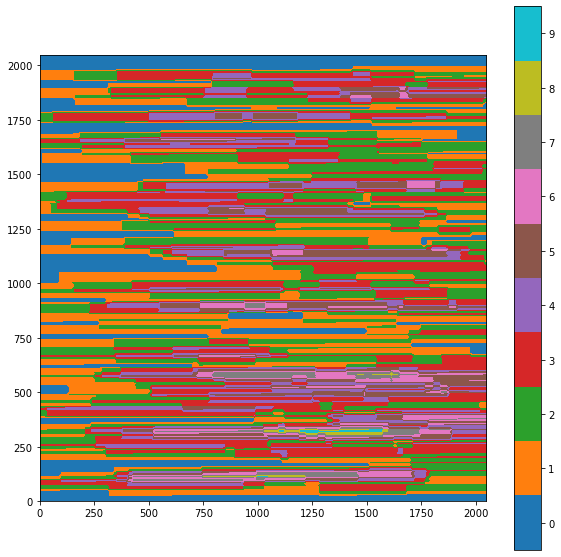

In [38]:
fig = mplplot.figure(figsize=(10,10))
mappable = mplplot.imshow(source_num_contam_map,cmap="tab10",origin="lower")
cbar = mplplot.colorbar(mappable, ax=mplplot.gca())
cbar.set_ticks(np.arange(0.5,10.5,1))
cbar.set_ticklabels(np.arange(0,10,1))

### Isolated source cutout from Contam Map + SOURCE ID SETTING!!!!!!

In [39]:
source1 = compute1stOrderTraceBox(
    (frame_info_merge.iloc[ID].Direct_X_pixel, frame_info_merge.iloc[ID].Direct_Y_pixel),
    filter_=filter_,
    module=module,
    direction=direction,
    ec="orange",
    lw="2",
    fc="none",
    returnRect=False
    # simYDisp=True,
)

### Source Cutout Map

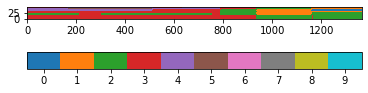

In [40]:
# IMPORTANT NOTE - THERE IS 0 SOURCES WITHIN A TRACE AS 1 HAS BEEN MINUSED 
# TO SHOW HOW MANY TRACES ARE CONTAMINATING THE INTENDED SOURCE

source_contam_cutout = apnndd.Cutout2D(source_num_contam_map,*source1)
mappable = mplplot.imshow(source_contam_cutout.data-1,cmap="tab10",vmin=0,vmax=10,origin='lower')
cbar = mplplot.colorbar(mappable, ax=mplplot.gca(),orientation='horizontal')
cbar.set_ticks(np.arange(0.5,10.5,1))
cbar.set_ticklabels(np.arange(0,10,1))

### Photometry Only Contam Map

In [41]:
full_im_pixel_coords_flux = np.mgrid[:2048,:2048].T.reshape((-1,2))

contam_flux_map = np.sum([compute1stOrderTraceBox(
    (x,y),
    filter_=filter_,
    module=module,
    direction=direction,
    ec="orange",
    lw="2",
    fc="none",
    # simYDisp=True,
).contains_points(full_im_pixel_coords_flux).reshape((2048,2048))*flux for sourceID, (x,y,flux) in enumerate(zip(frame_info_merge.Direct_X_pixel, frame_info_merge.Direct_Y_pixel,frame_info_merge.IRAC1_mJy))],axis=0)

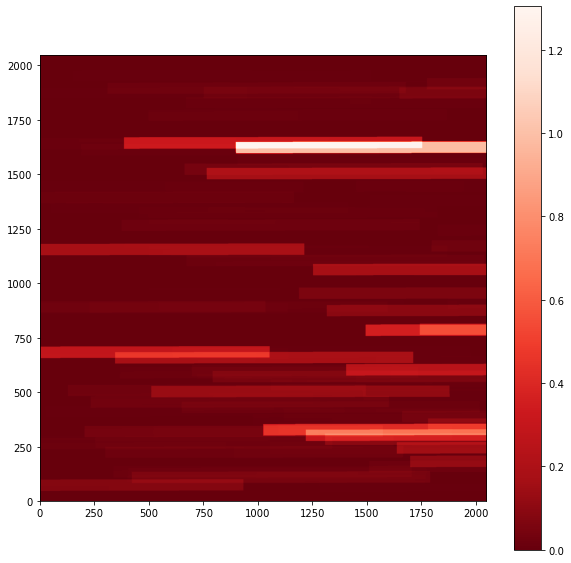

In [42]:
fig = mplplot.figure(figsize=(10,10))
mappable = mplplot.imshow(contam_flux_map,origin="lower",cmap='Reds_r')
cbar = mplplot.colorbar(mappable, ax=mplplot.gca())
# cbar.set_ticks(np.arange(0.5,10.5,1))
# cbar.set_ticklabels(np.arange(0,10,1))

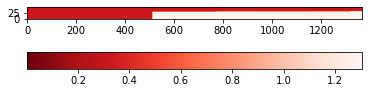

In [43]:
source_contam_cutout_flux = apnndd.Cutout2D(contam_flux_map,*source1)
mappable = mplplot.imshow(source_contam_cutout_flux.data-frame_info_merge.iloc[0].IRAC1_mJy,origin='lower',cmap='Reds_r')#,cmap="tab10",vmin=0,vmax=10)
cbar = mplplot.colorbar(mappable, ax=mplplot.gca(),orientation='horizontal')
# cbar.set_ticks(np.arange(0.5,10.5,1))
# cbar.set_ticklabels(np.arange(0,10,1))

### Sensitivity Curve + Flux Contamination Map

In [44]:
full_im_pixel_coords_flux_sens = np.mgrid[:2048,:2048].T.reshape((-1,2))

# *(PSFSensCurve[ID][PSFSensCurve[ID]!=0]/np.max(PSFSensCurve[ID][PSFSensCurve[ID]!=0]))
list_ = []
 
for sourceID, (x,y,flux) in enumerate(zip(frame_info_merge.Direct_X_pixel, frame_info_merge.Direct_Y_pixel,frame_info_merge.IRAC1_mJy)):
    trace_pos = compute1stOrderTraceBox(
    (x,y),
    filter_=filter_,
    module=module,
    direction=direction,
    ec="orange",
    lw="2",
    fc="none",
    # simYDisp=True,
    ).contains_points(full_im_pixel_coords_flux_sens).reshape((2048,2048))*flux
    
    sens_ratio = PSFSensCurve[sourceID]/np.max(PSFSensCurve[sourceID])
    
    for i in range(2048):
        trace_pos[i] = trace_pos[i]*sens_ratio
        
    list_.append(trace_pos)
contam_flux_sens_map = np.sum(list_,axis=0)

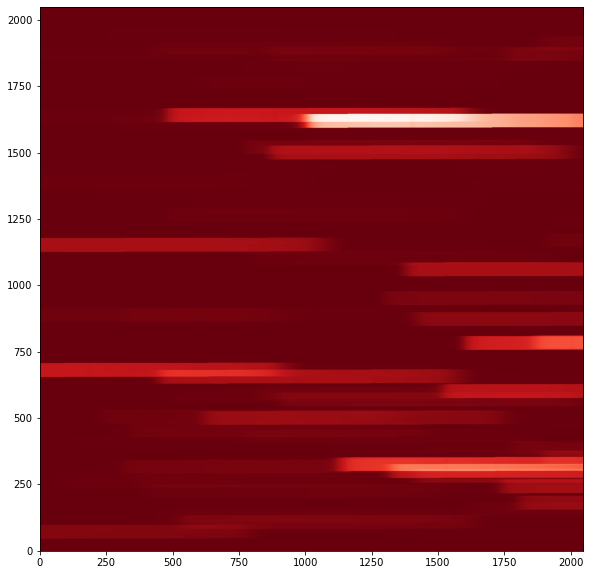

In [45]:
mplplot.figure(figsize=(10,10))
mplplot.imshow(contam_flux_sens_map,origin='lower',cmap='Reds_r')

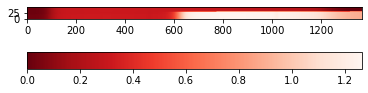

In [46]:
source_contam_cutout_sens_flux = apnndd.Cutout2D(contam_flux_sens_map,*source1)
mappable = mplplot.imshow(source_contam_cutout_sens_flux.data-np.min(PSFSensCurve[0]/np.max(PSFSensCurve[0])),cmap='Reds_r',origin='lower')#frame_info_merge.iloc[0].IRAC1_mJy,cmap="Reds")#,cmap="tab10",vmin=0,vmax=10)
cbar = mplplot.colorbar(mappable, ax=mplplot.gca(),orientation='horizontal')
# cbar.set_ticks(np.arange(0.5,10.5,1))
# cbar.set_ticklabels(np.arange(0,10,1))

## Convert to Flux to Jy

In [47]:
# pd.DataFrame(primaryTraceWL[0].to_list())[~np.isnan(pd.DataFrame(primaryXpixel[0].to_list()))]

In [48]:
# This converts a list of dataframes into a 3d numpy arrays with units
apunit_data = [pd.DataFrame(elem) for elem in (primaryFrameFluxCalData*apunits.erg/apunits.s/apunits.angstrom/apunits.cm**2).to(apunits.mJy,equivalencies=apunits.spectral_density(primaryTraceWLs*apunits.um))]
apunit_err = [pd.DataFrame(elem) for elem in (primaryFrameFluxErrCalData*apunits.erg/apunits.s/apunits.angstrom/apunits.cm**2).to(apunits.mJy,equivalencies=apunits.spectral_density(primaryTraceWLs*apunits.um))]

## SORT OUT

In [49]:
melissa_spec_no = frame_info_merge['No.'].iloc[ID]
orig_spec = pd.read_csv(f"reddened_stars_march22/redspect_{melissa_spec_no}.txt",delim_whitespace=True,header=[0,1])
# orig_spec

(-2.5, 2.0)

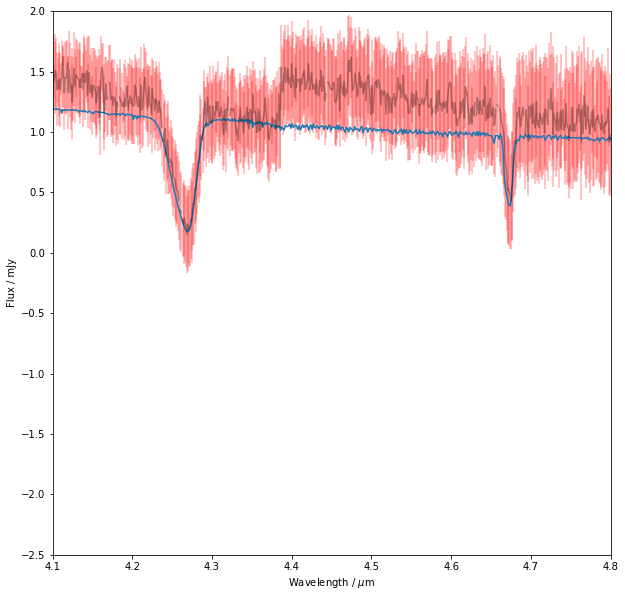

In [51]:
# Example Spectra plot with mJy Flux units
mplplot.figure(figsize=(10,10))
mplplot.errorbar(primaryTraceWLs[0].iloc[ID],apunit_data[0].iloc[ID],yerr=apunit_err[0].iloc[ID],ecolor='r',color='k',alpha=0.3)
mplplot.plot(orig_spec['wavelength'],orig_spec['flux']*4) # MULTIPLE BY 5 NEEDED???
mplplot.xlabel('Wavelength / $\mu$m')
mplplot.ylabel('Flux / mJy')
mplplot.xlim(4.1,4.8)
# mplplot.xlim(np.nanmin(primaryTraceWLs[0][ID]),np.nanmax(primaryTraceWLs[0][ID]))
mplplot.ylim(-2.5,2)

## Concatenate Dataframes

In [52]:
PrimaryDitherFluxes = pd.concat(apunit_data)
PrimaryDitherFluxesErr = pd.concat(apunit_err)
PrimaryDitherTraceWLs = pd.concat(primaryTraceWLs)
PrimaryDitherXPixels = pd.concat(primaryXPixels)
PrimaryDitherYPixels = pd.concat(primaryYPixels)

In [53]:
# Strong features: 384, 407 , 57, 377
# ID = 123 SET ABOVE
ChosenSourceFlux = PrimaryDitherFluxes.loc[ID]
ChosenSourceErr = PrimaryDitherFluxesErr.loc[ID]
ChosenSourceWLs = PrimaryDitherTraceWLs.loc[ID]
ChosenSourceX = PrimaryDitherXPixels.loc[ID]
ChosenSourceY = PrimaryDitherYPixels.loc[ID]
melissa_spec_no = frame_info_merge['No.'].iloc[ID]

### Original Spectra for Source

In [54]:
orig_spec = pd.read_csv(f"reddened_stars_march22/redspect_{melissa_spec_no}.txt",delim_whitespace=True,header=[0,1])
# orig_spec

## Combination Time

For now, set a hard limit on the max wavelength of F322W2 and minimum wavelength of F444W as 3.963μm for seamless stitching of spectra. 
If we find any spectra which have data within these crossover wavelengths, we can consider combining this data at a latter stage.

Thinking about number of bins required:
- Something I am uncertain on how to set right now so will experiment for now.

Can try:
- Resampling filters to separate wavelength ranges and then combining
    - Will mean we need a common wavelength for F322W2 filter to end with and F444W begins
or:
- Resample both filters to full wavelength range and then combine
    - This approach will allow full datasets to be used

Need to consider cutting off wavelength ranges in accordance to sensitivity curves
- Plot both filter sensitivity curves and determine which wavelengths to keep and which to cut
    - Use the wavelength at which the throughput's overlap for maximum sensitivity?


In [ ]:
print(len(ChosenSourceFlux.iloc[0][ChosenSourceFlux.iloc[0]!=0]))
print(len(ChosenSourceWLs.values[0][~np.isnan(ChosenSourceWLs.values[0])]))

In [1]:
ChosenSourceWLs.values[0][~np.isnan(ChosenSourceWLs.values[0])]

NameError: name 'ChosenSourceWLs' is not defined

In [55]:
all_frame_binned_fluxes = []
all_frame_binned_errors = []
for i, (f,e,w,x) in enumerate(zip(ChosenSourceFlux.values,ChosenSourceErr.values,ChosenSourceWLs.values,ChosenSourceX.values)):

    nbins = len(ChosenSourceWLs.values[0][~np.isnan(ChosenSourceWLs.values[0])])
    # Experiment with wavelength ranges
    # Attempt 1: Full WL range of Sens Filter with SAME NUMBER OF BINS AS WAVELENGTHS
    new_wavs = np.linspace(np.min(COSensData_WL),np.max(COSensData_WL), nbins)
    """
    binned_fluxes, binned_errors = spectres.spectres(new_wavs, current_WL_range, current_flux, spec_errs=current_flux_err, fill=None, verbose=False)
    """
    selection = ~np.isnan(w)
    f[np.isnan(f)] = 0
    e[np.isnan(f)] = 0
    
    binned_fluxes, binned_errors = spectres.spectres(new_wavs,w[selection],f[selection],spec_errs=e[selection], fill=0, verbose=False)
    # binned_fluxes = spectres.spectres(new_wavs,w[selection],f[selection],spec_errs=None, fill=0, verbose=False)
    all_frame_binned_fluxes.append(binned_fluxes)
    all_frame_binned_errors.append(binned_errors)

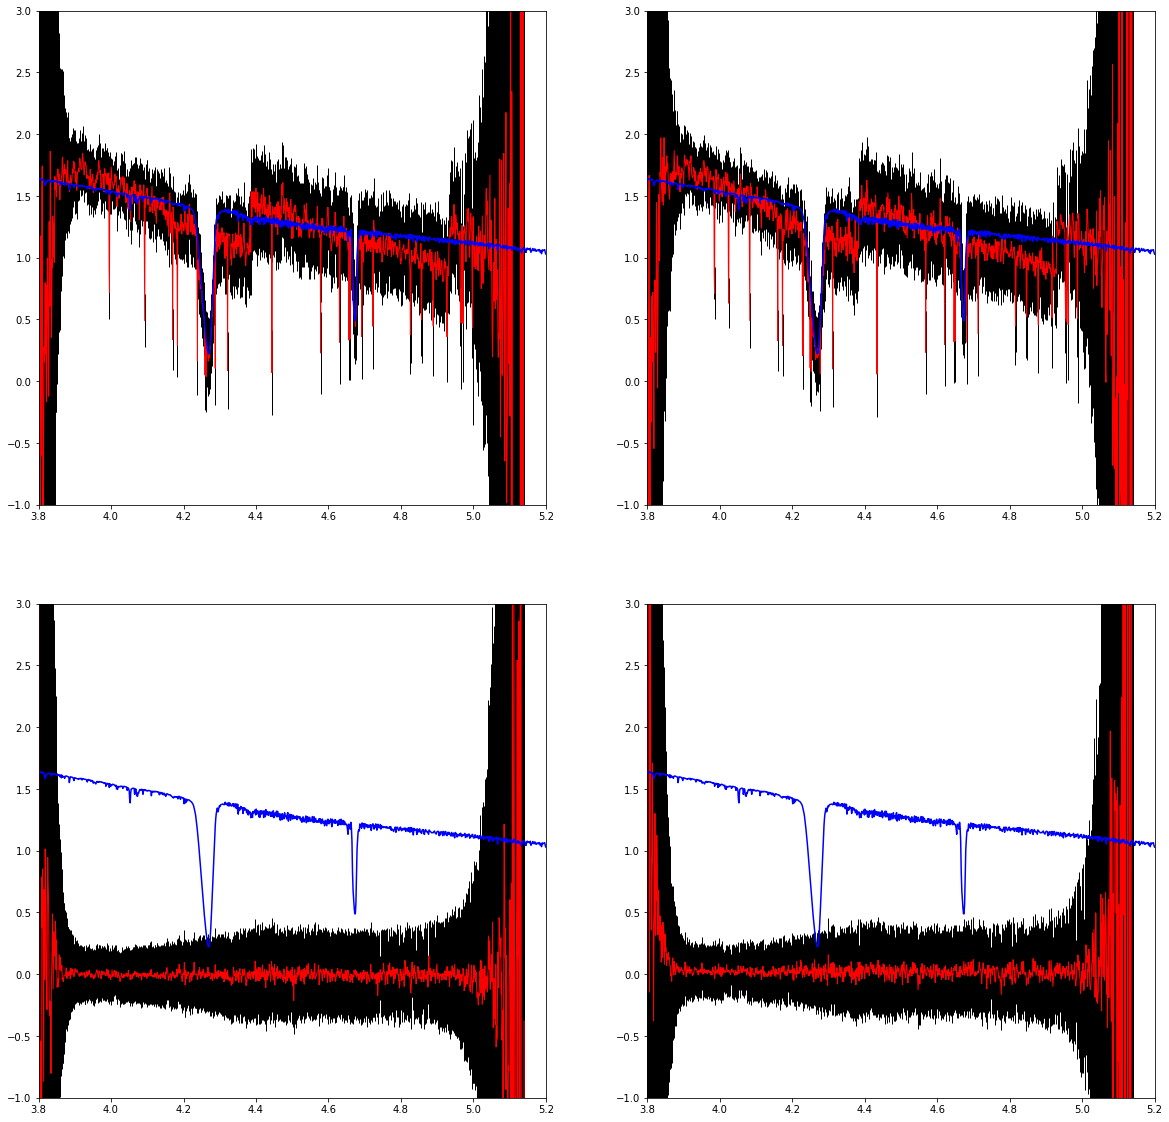

In [56]:
fig, panels = mplplot.subplots(
    nrows = 2,
    ncols = 2,
    figsize=(20,20))
for i, panel in enumerate(panels.ravel()):
    # panel.errorbar(FirstSourceWLs.iloc[i],FirstSourceFlux.iloc[i], yerr=FirstSourceErr.iloc[i], color='k', alpha=0.1)
    panel.errorbar(new_wavs,all_frame_binned_fluxes[i], yerr=all_frame_binned_errors[i], color="r", ecolor="k", lw=1,zorder=0)
    panel.plot(orig_spec['wavelength'],orig_spec['flux']*5,color='b',zorder=10)
    # print(new_wavs,all_frame_binned_fluxes[i], sep="\n\n")
    panel.set_xlim(3.8,5.2)
    panel.set_ylim(-1,3)
    

In [ ]:
# np.sqrt(np.sum(np.array(all_frame_binned_errors[:-1])**2, axis=0))

In [ ]:
# Do not need to take account of potential covariance between bins as this 
binned_fluxes, binned_errors = np.mean(all_frame_binned_fluxes, axis=0), np.sqrt(np.sum(np.array(all_frame_binned_errors)**2, axis=0)/4)
mplplot.figure(figsize=(12,12))
# for i in range(4):
# # print(binned_fluxes.shape)
    
    # mplplot.errorbar(new_wavs,all_frame_binned_fluxes[i], yerr=all_frame_binned_errors[i], color=f"C{i}", ecolor=f"C{i}", lw=1)
mplplot.errorbar(ChosenSourceWLs.iloc[0],ChosenSourceFlux.iloc[0], yerr=ChosenSourceErr.iloc[0], color='cyan',ecolor='k', alpha=0.5,label='1 Frame Spectra')
# mplplot.errorbar(new_wavs,binned_fluxes,yerr=binned_errors,lw=2,color='r',ecolor='b',alpha=0.7,label='Combined Spectra')
mplplot.plot(orig_spec['wavelength'],orig_spec['flux']*5,color='orange',zorder=10,label='Scaled Input Spectra')
mplplot.xlim(3.9,5)
mplplot.xlabel("$\lambda$ / $\mu$m")
mplplot.ylim(-0.5,2.5)
mplplot.ylabel("Flux / mJy")
mplplot.legend(loc='best')

## Box Method Setup

### Creating 3D Arrays (unequal lengths in 3rd dimension) to plot from

In [ ]:
# Stacking x and y pixel axis from TraceWL function so give the x and y shift position of
# every pixel within a trace for each source within the FoV
# axis=1 means the each sources x and pixels are stacked together
trace_pixels_arr = np.stack((ChosenSourceX.iloc[0][0], ChosenSourceY.iloc[0][0]), axis=1)

source_im_data = []
for i in range(trace_pixels_arr.shape[0]):

    # As trace_pixels_arr is always x = 0, y = 1, the disp direction only changes with grism direction
    # 
    if direction == "R":
        disp_pix = trace_pixels_arr[i][0]
        cross_disp_pix = trace_pixels_arr[i][1]
    else:
        disp_pix = trace_pixels_arr[i][1]
        cross_disp_pix = trace_pixels_arr[i][0]

    # disp_pix = source[0][i]
    # cross_disp_pix = source[1][i]
    # print(disp_pix)
    # print(np.round(cross_disp_pix))
    # print(data[int(cross_disp_pix)-2 : int(cross_disp_pix)+2,disp_pix])
    im_trace_pixel_data = np.sum(file_data[int(np.round(cross_disp_pix))-24 : int(np.round(cross_disp_pix))+25,int(disp_pix)])
    source_im_data.append(im_trace_pixel_data)

### Code for Box method for all Sources - adaptations needed

In [ ]:
# all_sources_im_data = []
# all_sources_init_params = []
# for index, source in enumerate(trace_pixels_arr):

#     source_im_data = []
#     source_init_param = []
#     for i, position in enumerate(source[0]):
        
#         # As trace_pixels_arr is always x = 0, y = 1, the disp direction only changes with grism direction
#         # 
#         if direction == "R":
#             disp_pix = source[0][i]
#             cross_disp_pix = source[1][i]
#         else:
#             disp_pix = source[1][i]
#             cross_disp_pix = source[0][i]

#         # disp_pix = source[0][i]
#         # cross_disp_pix = source[1][i]
#         # print(disp_pix)
#         # print(data[int(cross_disp_pix)-2 : int(cross_disp_pix)+2,disp_pix])
#         im_trace_pixel_data = np.sum(data[int(cross_disp_pix)-24 : int(cross_disp_pix)+25,disp_pix])
#         source_im_data.append(im_trace_pixel_data)
#         init_param_pixel = data[int(cross_disp_pix),disp_pix]
#         source_init_param.append(init_param_pixel)

    # all_sources_im_data.append(source_im_data)
    # all_sources_init_params.append(source_init_param)

## Plotting for 1 source

In [ ]:
figure,(
        cutoutPanel,
        sourceContamPanel,
        fluxContamPanel,
        boxPanel,
        # optboxPanel,
        # standardIPextractedPanel,
        extractedPanel,
        combinedSpecPanel,
        sensPanel
    ) = mplplot.subplots(
        figsize=(21, 15),
        ncols=1,
        nrows=7,
        # gridspec_kw=dict(height_ratios=[1, 3, 3]),
    )

"""Source Image Cutout/2D Spectra"""
traceBox1st = compute1stOrderTraceBox(
        (frame_info_merge.Direct_X_pixel.iloc[ID],frame_info_merge.Direct_Y_pixel.iloc[ID]),
        filter_=filter_,
        module=module,
        direction=direction,
        returnRect=False,
        # simYDisp=True,
    )
    # print(traceBox1st)

cutout = apnndd.Cutout2D(
    fits_file["SCI"].data, *traceBox1st, mode="trim"#, wcs=apwcs.WCS(fits_file["SCI"].header)
    )


cutoutPanel.imshow(
    cutout.data,#[slice(psf1d.size // 4, 3 * psf1d.size // 4)],
    aspect="auto",
    norm=apvis.ImageNormalize(
        stretch=apvis.HistEqStretch(data=cutout.data),
        interval=apvis.ZScaleInterval(),
    ),
    origin='lower',
    cmap="Greys",
    extent=(cutout.xmin_original,cutout.xmax_original,cutout.ymax_original,cutout.ymin_original)
)
if np.round(traceBox1st[0][0]+(traceBox1st[1][1]/2)) > 2048:
    cutoutPanel.set_xlim(np.round(traceBox1st[0][0]-(traceBox1st[1][1]/2)),2048)
elif np.round(traceBox1st[0][0]-(traceBox1st[1][1]/2)) < 0:
        cutoutPanel.set_xlim(0,np.round(traceBox1st[0][0]+(traceBox1st[1][1]/2)))
else:
    cutoutPanel.set_xlim(np.round(traceBox1st[0][0]-(traceBox1st[1][1]/2)),np.round(traceBox1st[0][0]+(traceBox1st[1][1]/2)))


TraceLine_x,TraceLine_y,_ = computeTraceWLR(
    (frame_info_merge.Direct_X_pixel.iloc[ID],frame_info_merge.Direct_Y_pixel.iloc[ID]),
    filter_=filter_,
    module=module,
    #direction=direction,
)
TraceLine_xCutoff = TraceLine_x[(TraceLine_x>=0)&(TraceLine_x<2048)]
TraceLine_yCutoff = TraceLine_y[(TraceLine_x>=0)&(TraceLine_x<2048)]

cutoutPanel.plot(TraceLine_xCutoff,TraceLine_yCutoff, c='orange', lw=4)
cutoutPanel.set_title(f"Melissa Source {ID} 2D Spectrum and Trace")

"""Number of Sources Contam Map"""
# IMPORTANT NOTE - THERE IS 0 SOURCES WITHIN A TRACE AS 1 HAS BEEN MINUSED 
# TO SHOW HOW MANY TRACES ARE CONTAMINATING THE INTENDED SOURCE

source_contam_cutout = apnndd.Cutout2D(source_num_contam_map,*source1)
mappable = sourceContamPanel.imshow(source_contam_cutout.data-1,cmap="tab10",vmin=0,vmax=10,origin='lower')
cbar = mplplot.colorbar(mappable, ax=sourceContamPanel,orientation='horizontal')
cbar.set_ticks(np.arange(0.5,10.5,1))
cbar.set_ticklabels(np.arange(0,10,1))

"""Flux+Sensitivity Contam Map"""
source_contam_cutout_sens_flux = apnndd.Cutout2D(contam_flux_sens_map,*source1)
# MINUS THE MINIMUM VALUE OF THE SOURCE FLUX - COULD THIS BE JUST MINUS THE SOURCE FLUX ACROSS BOX???
mappable = fluxContamPanel.imshow(source_contam_cutout_sens_flux.data-np.min(PSFSensCurve[0]/np.max(PSFSensCurve[0])),cmap='Reds_r',origin='lower')#frame_info_merge.iloc[0].IRAC1_mJy,cmap="Reds")#,cmap="tab10",vmin=0,vmax=10)
cbar = mplplot.colorbar(mappable, ax=fluxContamPanel,orientation='horizontal')
# cbar.set_ticks(np.arange(0.5,10.5,1))
# cbar.set_ticklabels(np.arange(0,10,1))

"""Box Method Data ±25 pixels from centre pixel"""
wavelengths = ChosenSourceWLs.iloc[0][~np.isnan(ChosenSourceWLs.iloc[0])]

BoxCalibratedFlux = source_im_data/PSFSensCurves[0][ID][PSFSensCurves[0][ID]!=0]

if filter_ == "F322W2":
    wavelengths_mask = (wavelengths>=2.5) & (wavelengths<3.9)
else:
    wavelengths_mask = (wavelengths>=3.9) & (wavelengths<5)
# mplplot.step(wavelengths[wavelengths_mask], sub_result[trace_pixels_indexes[position]][wavelengths_mask],color='k', linewidth=1.75, label="Flux and Wavelength calibrated Fit")
# mplplot.errorbar(wavelengths[wavelengths_mask], sub_result[trace_pixels_indexes[position]][wavelengths_mask],yerr=sub_result_err[trace_pixels_indexes[position]][wavelengths_mask],color='k',lw=0.75,ecolor='r', elinewidth=1,label='Errorbars')

# BOX METHOD ±25 pixels from centre pixel
boxPanel.plot(wavelengths,BoxCalibratedFlux, label="Box Method")
boxPanel.plot(orig_spec['wavelength'],orig_spec['flux']*1.3e-16,color='b',zorder=10)
boxPanel.set_title("Box Method 1D Spectrum (Unweighed)")
boxPanel.set_xlabel('$\lambda$ / $\mu$m')
boxPanel.set_xlim(3.8,5.1)
boxPanel.set_ylim(0,7e-17)
boxPanel.set_ylabel('Flux / erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$' )
boxPanel.legend(loc='best')
# if np.max(BoxCalibratedFlux[wavelengths_mask]) > 1e-16:
#     boxPanel.set_ylim(-3e-17,9e-17)
# if np.min(BoxCalibratedFlux[wavelengths_mask]) < -2e-17:
#     boxPanel.set_ylim(-3e-17,9e-17)

"""Optimal Box Extraction (Non-PSF)"""
# make_it_work = OptBoxCalibratedFlux[source]
# # print(np.any(np.isnan(make_it_work)))
# # print(np.min(make_it_work))
# make_it_work = make_it_work[(OptWeightBoxRes[source] < 999) | (np.isnan(OptWeightBoxRes[source]))]
# # print(np.any(np.isnan(make_it_work)))
# # print(np.min(make_it_work))
# #     print(len(make_it_work))
# # make_it_work[make_it_work > 700] = np.nan
# # print(np.any(np.isnan(make_it_work)))
# # print(trace_WL[source].shape, make_it_work.shape)

# optboxPanel.plot(wavelengths[wavelengths_mask],make_it_work[wavelengths_mask], label="Box Method")
# optboxPanel.set_title("Optimally Weighted Box Method 1D Spectrum ")
# optboxPanel.set_xlabel('$\lambda$ / $\mu$m')
# # optboxPanel.set_ylim(*np.percentile(BoxCalibratedFlux[wavelengths_mask],(1,99)))
# optboxPanel.set_ylabel('Flux / erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$' )
# optboxPanel.legend(loc='best')
# # if np.max(make_it_work[wavelengths_mask]) > 1e-16:
# #     optboxPanel.set_ylim(-3e-17,9e-17)
# # if np.min(make_it_work[wavelengths_mask]) < -2e-17:
# #     optboxPanel.set_ylim(-3e-17,9e-17)

"""PSF-Extracted Spectra with Standard Initial Parameters"""

"""PSF-Extracted Spectra with Opt Box Parameters"""
extractedPanel.errorbar(ChosenSourceWLs.iloc[0],ChosenSourceFlux.iloc[0],yerr=ChosenSourceErr.iloc[0],color='k',lw=0.75,ecolor='r', elinewidth=1,label='Fit w/ Errors') # alpha=0.3,
extractedPanel.plot(orig_spec['wavelength'],orig_spec['flux']*4,color='b',zorder=10)
extractedPanel.set_title("PSF (Opt Box) Fitted 1D Spectrum")
extractedPanel.set_xlabel('$\lambda$ / $\mu$m')
extractedPanel.set_xlim(3.8,5.1)
extractedPanel.set_ylim(0,2.5)
extractedPanel.set_ylabel('Flux / mJy' )
extractedPanel.legend(loc='best')

"""Combined Spectra from 4 subpixel Dithers"""
combinedSpecPanel.errorbar(new_wavs,binned_fluxes,yerr=binned_errors,color='k',ecolor='r',label="Combined Spectra")
combinedSpecPanel.plot(orig_spec['wavelength'],orig_spec['flux']*4,color='b',zorder=10)
combinedSpecPanel.set_xlim(3.8,5.1)
combinedSpecPanel.set_ylim(0,2.5)
combinedSpecPanel.set_xlabel('$\lambda$ / $\mu$m')
combinedSpecPanel.set_ylabel('Flux / mJy' )
combinedSpecPanel.set_title("4 Sub-Pixel Frame Spectral Combination")
combinedSpecPanel.legend(loc='best')

"""Sensitivity Panel"""
sensPanel.plot(wavelengths,PSFSensCurves[0][ID][PSFSensCurves[0][ID]!=0])
sensPanel.set_xlabel('$\lambda$ / $\mu$m')
sensPanel.set_ylabel('Throughput')
sensPanel.set_xlim(3.8,5.1)
sensPanel.set_title("Spectral Response Function for Valid $\lambda$ Range")
mplplot.tight_layout()

In [ ]:
for source, (
    sub_result, sub_result_err,
    x,y) in enumerate(zip(
    calibratedFlux,calibratedFluxErr,
    in_frame_source_data.Direct_X_pixel, in_frame_source_data.Direct_Y_pixel)):

    figure,(
        cutoutPanel,
        sourceContamPanel,
        fluxContamPanel,
        boxPanel,
        optboxPanel,
        # standardIPextractedPanel,
        extractedPanel,
        #combinedSpecPanel,
        sensPanel
    ) = mplplot.subplots(
        figsize=(21, 8),
        ncols=1,
        nrows=7,
        # gridspec_kw=dict(height_ratios=[1, 3, 3]),
    )
    
    traceBox1st = compute1stOrderTraceBox(
        (x,y),
        filter_=filter_,
        module=module,
        direction=direction,
        returnRect=False,
        # simYDisp=True,
    )
    # print(traceBox1st)

    cutout = apnndd.Cutout2D(
        fits_file["SCI"].data, *traceBox1st, mode="trim"#, wcs=apwcs.WCS(fits_file["SCI"].header)
        )
    
    
    cutoutPanel.imshow(
        cutout.data,#[slice(psf1d.size // 4, 3 * psf1d.size // 4)],
        aspect="auto",
        norm=apvis.ImageNormalize(
            stretch=apvis.HistEqStretch(data=cutout.data),
            interval=apvis.ZScaleInterval(),
        ),
        cmap="Greys",
        extent=(cutout.xmin_original,cutout.xmax_original,cutout.ymax_original,cutout.ymin_original)
    )
    
    
    TraceLine_x,TraceLine_y,_ = computeTraceWLR(
        (x,y),
        filter_=filter_,
        module=module,
        #direction=direction,
    )
    
    TraceLine_xCutoff = TraceLine_x[(TraceLine_x>=0)&(TraceLine_x<2048)]
    TraceLine_yCutoff = TraceLine_y[(TraceLine_x>=0)&(TraceLine_x<2048)]
    
    # TraceLine_xCutoff -= cutout.xmin_original #input_position_original[0]-(cutout.data.shape[0]/2)
    # TraceLine_yCutoff -= cutout.ymin_original
    
    cutoutPanel.plot(TraceLine_xCutoff,TraceLine_yCutoff, c='orange', lw=4)
    cutoutPanel.set_title(f"Trace Number {source}, Source ID {in_frame_source_data.FengwuID[source]} \n2D Spectrum and Trace")
    
    # cutoutPanel.set_xticks(np.arange(cutout.xmin_original,cutout.xmax_original,100))
    # cutoutPanel.set_xlim()
#     cutoutPanel.set_ylim(0,50)
    
    wavelengths = trace_WL[source]
    
#     print(wavelengths.size)
    
#     print(len(all_sources_im_data[source]))
#     print(len(OptBoxresultSensCurve[source][OptBoxresultSensCurve[source]!=0]))
    
    # Box Method Data
    BoxCalibratedFlux = all_sources_im_data[source]/OptBoxresultSensCurve[source][OptBoxresultSensCurve[source]!=0]
    
    if filter_ == "F322W2":
        wavelengths_mask = (wavelengths>=2.5) & (wavelengths<3.9)
    else:
        wavelengths_mask = (wavelengths>=3.9) & (wavelengths<5)
    # mplplot.step(wavelengths[wavelengths_mask], sub_result[trace_pixels_indexes[position]][wavelengths_mask],color='k', linewidth=1.75, label="Flux and Wavelength calibrated Fit")
    # mplplot.errorbar(wavelengths[wavelengths_mask], sub_result[trace_pixels_indexes[position]][wavelengths_mask],yerr=sub_result_err[trace_pixels_indexes[position]][wavelengths_mask],color='k',lw=0.75,ecolor='r', elinewidth=1,label='Errorbars')
    
    # BOX METHOD ±25 pixels from centre pixel
    boxPanel.plot(wavelengths[wavelengths_mask],BoxCalibratedFlux[wavelengths_mask], label="Box Method")
    boxPanel.set_title("Box Method 1D Spectrum (Unweighed)")
    boxPanel.set_xlabel('$\lambda$ / $\mu$m')
    boxPanel.set_ylim(*np.percentile(BoxCalibratedFlux[wavelengths_mask],(1,99)))
    boxPanel.set_ylabel('Flux / erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$' )
    boxPanel.legend(loc='best')
    if np.max(BoxCalibratedFlux[wavelengths_mask]) > 1e-16:
        boxPanel.set_ylim(-3e-17,9e-17)
    if np.min(BoxCalibratedFlux[wavelengths_mask]) < -2e-17:
        boxPanel.set_ylim(-3e-17,9e-17)
        
    # Optimally Weighted Box Method Extraction 
    make_it_work = OptBoxCalibratedFlux[source]
    # print(np.any(np.isnan(make_it_work)))
    # print(np.min(make_it_work))
    make_it_work = make_it_work[(OptWeightBoxRes[source] < 999) | (np.isnan(OptWeightBoxRes[source]))]
    # print(np.any(np.isnan(make_it_work)))
    # print(np.min(make_it_work))
#     print(len(make_it_work))
    # make_it_work[make_it_work > 700] = np.nan
    # print(np.any(np.isnan(make_it_work)))
    # print(trace_WL[source].shape, make_it_work.shape)
    
    optboxPanel.plot(wavelengths[wavelengths_mask],make_it_work[wavelengths_mask], label="Box Method")
    optboxPanel.set_title("Optimally Weighted Box Method 1D Spectrum ")
    optboxPanel.set_xlabel('$\lambda$ / $\mu$m')
    # optboxPanel.set_ylim(*np.percentile(BoxCalibratedFlux[wavelengths_mask],(1,99)))
    optboxPanel.set_ylabel('Flux / erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$' )
    optboxPanel.legend(loc='best')
    # if np.max(make_it_work[wavelengths_mask]) > 1e-16:
    #     optboxPanel.set_ylim(-3e-17,9e-17)
    # if np.min(make_it_work[wavelengths_mask]) < -2e-17:
    #     optboxPanel.set_ylim(-3e-17,9e-17)
    
    extractedPanel.errorbar(wavelengths[wavelengths_mask], sub_result[trace_x_pixels[source]][wavelengths_mask],yerr=sub_result_err[trace_x_pixels[source]][wavelengths_mask],color='k',lw=0.75,ecolor='r', elinewidth=1,label='Fit w/ Errors') # alpha=0.3,
    extractedPanel.set_title("PSF Fitted 1D Spectrum")
    extractedPanel.set_xlabel('$\lambda$ / $\mu$m')
    extractedPanel.set_ylim(-0.5e-17,8.5e-17)
    extractedPanel.set_ylabel('Flux / erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$' )
    extractedPanel.legend(loc='best')
    
    sensPanel.plot(wavelengths,OptBoxresultSensCurve[source][OptBoxresultSensCurve[source]!=0])
    sensPanel.set_xlabel('$\lambda$ / $\mu$m')
    sensPanel.set_ylabel('Throughput')
    sensPanel.set_title("Spectral Response Function for Valid $\lambda$ Range")
    mplplot.tight_layout()

## Plotting for all sources

In [ ]:
for source, (
    sub_result, sub_result_err,
    x,y) in enumerate(zip(
    calibratedFlux,calibratedFluxErr,
    in_frame_source_data.Direct_X_pixel, in_frame_source_data.Direct_Y_pixel)):

    figure,(
        cutoutPanel,
        sourceContamPanel,
        fluxContamPanel,
        boxPanel,
        optboxPanel,
        # standardIPextractedPanel,
        extractedPanel,
        #combinedSpecPanel,
        sensPanel
    ) = mplplot.subplots(
        figsize=(21, 8),
        ncols=1,
        nrows=7,
        # gridspec_kw=dict(height_ratios=[1, 3, 3]),
    )
    
    traceBox1st = compute1stOrderTraceBox(
        (x,y),
        filter_=filter_,
        module=module,
        direction=direction,
        returnRect=False,
        # simYDisp=True,
    )
    # print(traceBox1st)

    cutout = apnndd.Cutout2D(
        fits_file["SCI"].data, *traceBox1st, mode="trim"#, wcs=apwcs.WCS(fits_file["SCI"].header)
        )
    
    
    cutoutPanel.imshow(
        cutout.data,#[slice(psf1d.size // 4, 3 * psf1d.size // 4)],
        aspect="auto",
        norm=apvis.ImageNormalize(
            stretch=apvis.HistEqStretch(data=cutout.data),
            interval=apvis.ZScaleInterval(),
        ),
        cmap="Greys",
        extent=(cutout.xmin_original,cutout.xmax_original,cutout.ymax_original,cutout.ymin_original)
    )
    
    
    TraceLine_x,TraceLine_y,_ = computeTraceWLR(
        (x,y),
        filter_=filter_,
        module=module,
        #direction=direction,
    )
    
    TraceLine_xCutoff = TraceLine_x[(TraceLine_x>=0)&(TraceLine_x<2048)]
    TraceLine_yCutoff = TraceLine_y[(TraceLine_x>=0)&(TraceLine_x<2048)]
    
    # TraceLine_xCutoff -= cutout.xmin_original #input_position_original[0]-(cutout.data.shape[0]/2)
    # TraceLine_yCutoff -= cutout.ymin_original
    
    cutoutPanel.plot(TraceLine_xCutoff,TraceLine_yCutoff, c='orange', lw=4)
    cutoutPanel.set_title(f"Trace Number {source}, Source ID {in_frame_source_data.FengwuID[source]} \n2D Spectrum and Trace")
    
    # cutoutPanel.set_xticks(np.arange(cutout.xmin_original,cutout.xmax_original,100))
    # cutoutPanel.set_xlim()
#     cutoutPanel.set_ylim(0,50)
    
    wavelengths = trace_WL[source]
    
#     print(wavelengths.size)
    
#     print(len(all_sources_im_data[source]))
#     print(len(OptBoxresultSensCurve[source][OptBoxresultSensCurve[source]!=0]))
    
    # Box Method Data
    BoxCalibratedFlux = all_sources_im_data[source]/OptBoxresultSensCurve[source][OptBoxresultSensCurve[source]!=0]
    
    if filter_ == "F322W2":
        wavelengths_mask = (wavelengths>=2.5) & (wavelengths<3.9)
    else:
        wavelengths_mask = (wavelengths>=3.9) & (wavelengths<5)
    # mplplot.step(wavelengths[wavelengths_mask], sub_result[trace_pixels_indexes[position]][wavelengths_mask],color='k', linewidth=1.75, label="Flux and Wavelength calibrated Fit")
    # mplplot.errorbar(wavelengths[wavelengths_mask], sub_result[trace_pixels_indexes[position]][wavelengths_mask],yerr=sub_result_err[trace_pixels_indexes[position]][wavelengths_mask],color='k',lw=0.75,ecolor='r', elinewidth=1,label='Errorbars')
    
    # BOX METHOD ±25 pixels from centre pixel
    boxPanel.plot(wavelengths[wavelengths_mask],BoxCalibratedFlux[wavelengths_mask], label="Box Method")
    boxPanel.set_title("Box Method 1D Spectrum (Unweighed)")
    boxPanel.set_xlabel('$\lambda$ / $\mu$m')
    boxPanel.set_ylim(*np.percentile(BoxCalibratedFlux[wavelengths_mask],(1,99)))
    boxPanel.set_ylabel('Flux / erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$' )
    boxPanel.legend(loc='best')
    if np.max(BoxCalibratedFlux[wavelengths_mask]) > 1e-16:
        boxPanel.set_ylim(-3e-17,9e-17)
    if np.min(BoxCalibratedFlux[wavelengths_mask]) < -2e-17:
        boxPanel.set_ylim(-3e-17,9e-17)
        
    # Optimally Weighted Box Method Extraction 
    make_it_work = OptBoxCalibratedFlux[source]
    # print(np.any(np.isnan(make_it_work)))
    # print(np.min(make_it_work))
    make_it_work = make_it_work[(OptWeightBoxRes[source] < 999) | (np.isnan(OptWeightBoxRes[source]))]
    # print(np.any(np.isnan(make_it_work)))
    # print(np.min(make_it_work))
#     print(len(make_it_work))
    # make_it_work[make_it_work > 700] = np.nan
    # print(np.any(np.isnan(make_it_work)))
    # print(trace_WL[source].shape, make_it_work.shape)
    
    optboxPanel.plot(wavelengths[wavelengths_mask],make_it_work[wavelengths_mask], label="Box Method")
    optboxPanel.set_title("Optimally Weighted Box Method 1D Spectrum ")
    optboxPanel.set_xlabel('$\lambda$ / $\mu$m')
    # optboxPanel.set_ylim(*np.percentile(BoxCalibratedFlux[wavelengths_mask],(1,99)))
    optboxPanel.set_ylabel('Flux / erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$' )
    optboxPanel.legend(loc='best')
    # if np.max(make_it_work[wavelengths_mask]) > 1e-16:
    #     optboxPanel.set_ylim(-3e-17,9e-17)
    # if np.min(make_it_work[wavelengths_mask]) < -2e-17:
    #     optboxPanel.set_ylim(-3e-17,9e-17)
    
    extractedPanel.errorbar(wavelengths[wavelengths_mask], sub_result[trace_x_pixels[source]][wavelengths_mask],yerr=sub_result_err[trace_x_pixels[source]][wavelengths_mask],color='k',lw=0.75,ecolor='r', elinewidth=1,label='Fit w/ Errors') # alpha=0.3,
    extractedPanel.set_title("PSF Fitted 1D Spectrum")
    extractedPanel.set_xlabel('$\lambda$ / $\mu$m')
    extractedPanel.set_ylim(-0.5e-17,8.5e-17)
    extractedPanel.set_ylabel('Flux / erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$' )
    extractedPanel.legend(loc='best')
    
    sensPanel.plot(wavelengths,OptBoxresultSensCurve[source][OptBoxresultSensCurve[source]!=0])
    sensPanel.set_xlabel('$\lambda$ / $\mu$m')
    sensPanel.set_ylabel('Throughput')
    sensPanel.set_title("Spectral Response Function for Valid $\lambda$ Range")
    mplplot.tight_layout()

## Unstacking - SHOW SUBPIXEL DITHER EFFECT ON WAVELENGTH

In [59]:
# unstacked_wavelengths = pd.DataFrame(nan_padded_wavelengths_arr,index=PrimaryDitherFluxes.index).groupby(level=0).apply(lambda grp: grp.unstack()).reset_index(level=2, drop=True)
unstacked_wavelengths = PrimaryDitherTraceWLs.groupby(level=0).apply(lambda grp: grp.unstack()).reset_index(level=2, drop=True)
unstacked_fluxes = PrimaryDitherFluxes.groupby(level=0).apply(lambda grp: grp.unstack()).reset_index(level=2, drop=True)
unstacked_errors = PrimaryDitherFluxesErr.groupby(level=0).apply(lambda grp: grp.unstack()).reset_index(level=2, drop=True)

(-1.0, 1.0)

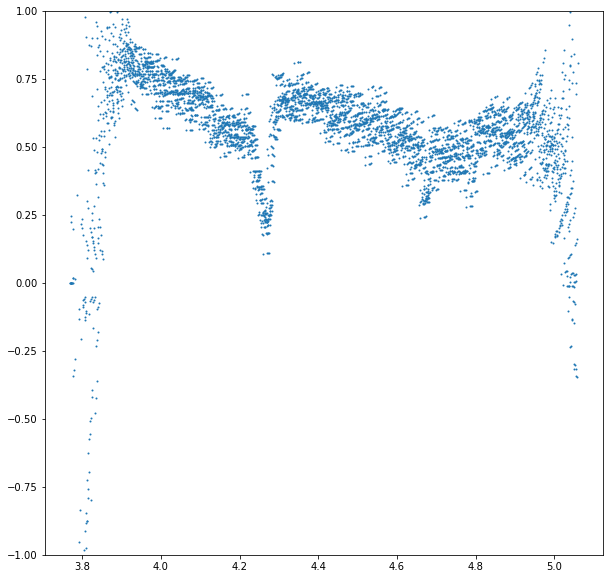

In [67]:
mplplot.figure(figsize=(10,10))
mplplot.scatter(unstacked_wavelengths.loc[ID], unstacked_fluxes.loc[ID], s=1)
mplplot.ylim(-1, 1)

In [64]:
np.sum(unstacked_fluxes.loc[111])

2368.0435543668364